In [11]:
from matplotlib import pyplot as plt
from pandas import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
# plt.rcParams["figure.figsize"] = (10,8)
# plt.style.use(['science' , 'notebook', 'grid'])

## Introduction

In this jupyter notebook we are working with simulated cluster detections.
There is a table of simulated clusters that were entered into a stellar field, and another table
of detections, where a positional match has already been made between the simulated and detected clusters.

In this round, 66 globular clusters with exponential density profile were simulated,
where each cluster is located at the center of a HealPix pixel with nside=64,
with the distance between one cluster and another ~1 degree and a half-light radius of ~1 arcmin.

Below is information about detections only.

In [12]:
RA, DEC, wrad, DistDet_kpc, m_M_det, SNR, wave_peak, \
Dist2object_arcmin, hlr_times_3_arcmin, SNR_rank, \
Wave_r3, DistSimulation_kpc, m_M_simulation, M_m_Det_minus_Sim, \
SNR_est = np.loadtxt('detections.txt', usecols=(1,2,3,4,5,6,7,9,10,12,13,14,16,17,18), unpack=True)

In [13]:
RA_conf, DEC_conf, wrad_conf, DistDet_kpc_conf, m_M_det_conf, SNR_conf, wave_peak_conf, \
Dist2object_arcmin_conf, hlr_times_3_arcmin_conf, SNR_rank_conf, \
Wave_r3_conf, DistSimulation_kpc_conf, m_M_simulation_conf, M_m_Det_minus_Sim_conf, \
SNR_est_conf = RA[real_det], DEC[real_det], wrad[real_det], DistDet_kpc[real_det], m_M_det[real_det], SNR, wave_peak[real_det], \
Dist2object_arcmin[real_det], hlr_times_3_arcmin[real_det], SNR_rank[real_det], \
Wave_r3[real_det], DistSimulation_kpc[real_det], m_M_simulation[real_det], M_m_Det_minus_Sim[real_det], \
SNR_est[real_det]

In [14]:
Name, Class = np.loadtxt('detections.txt', usecols=(8, 11), dtype=str, unpack=True)

In [15]:
N, HPX64, N0_order = np.loadtxt('detections.txt', usecols=(0, 15, 19), dtype=int, unpack=True)

Below, a conditional is created where the clusters matched the simulated (confirmed)
and where clusters are just candidates.

In [16]:
real_det = (Class == 'conf')
false_positive = (Class == 'cand')

Below, a conditional is created where the clusters matched the simulated (confirmed)
and where clusters are just candidates.

Text(0.5, 1.0, 'Spatial distribution of clusters detected by Gawa wrt SNR')

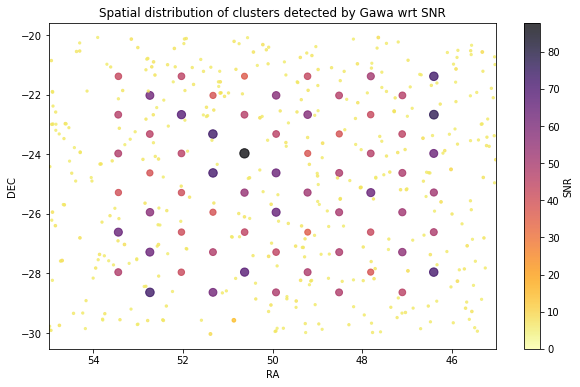

In [17]:
cm = plt.cm.get_cmap('inferno_r')
plt.figure(figsize=(10, 6))
sc = plt.scatter(RA, DEC, c= SNR, vmin=0, vmax=np.max(SNR),  s=SNR, cmap=cm, alpha=0.75)
plt.colorbar(sc,label = 'SNR')
plt.xlim(np.max(RA), np.min(RA))
plt.xlabel('RA')
plt.ylabel('DEC')
plt.title('Spatial distribution of clusters detected by Gawa wrt SNR')

We can notice that all detected and true clusters (True Positives) have high signal-to-noise ratio (SNR),
while those with low SNR are false positives (FP), represented by small blue circles.

It is important to highlight in this case that all simulated clusters were detected. There may be cases where
not all simulated clusters are detected. In this case, the code should read the clusters
simulated again to see how complete the detection is.

## Purity of detection distance

Below we will calculate the detection purity given the detected distance.

In [18]:
def plot_pure(arg_all, arg_conf, label, title):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
    A = ax1.hist(arg_all, bins=20, range=(np.min(arg_all), np.max(arg_all)), histtype='step', label='All detections')
    B = ax1.hist(arg_conf, bins=20, range=(np.min(arg_all), np.max(arg_all)), histtype='step', label='True clusters')
    pureness = B[0] / A[0]
    ax1.set_xlabel(label)
    ax1.set_ylabel( 'Number of clusters detected')
    ax1.legend()
    
    plt.step(A[1][0:-1], np.nan_to_num(pureness), ':r', label='NaN=0.')
    ax2.step(A[1][0:-1],pureness, label='Data', color='k')
    ax2.set_xlabel(label)
    ax2.set_ylabel('Puriness')
    ax2.set_ylim([0,1.2])
    ax2.legend()
    fig.suptitle(title)
    plt.show()

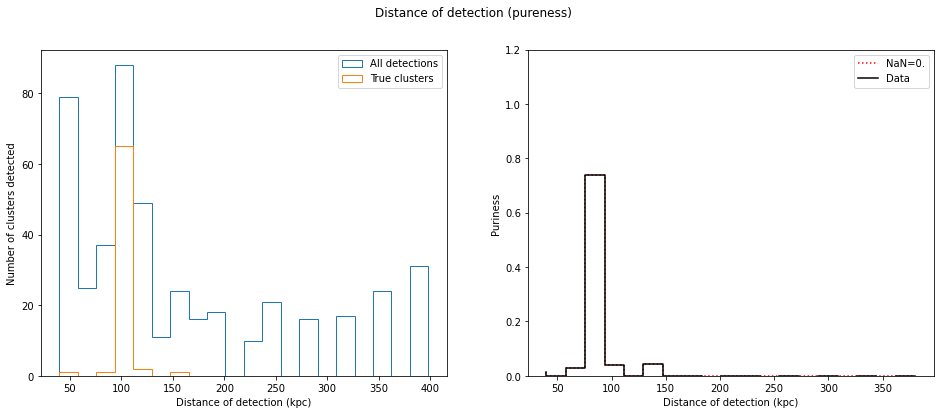

In [19]:
plot_pure(DistDet_kpc, DistDet_kpc_conf , 'Distance of detection (kpc)', 'Distance of detection (pureness)')

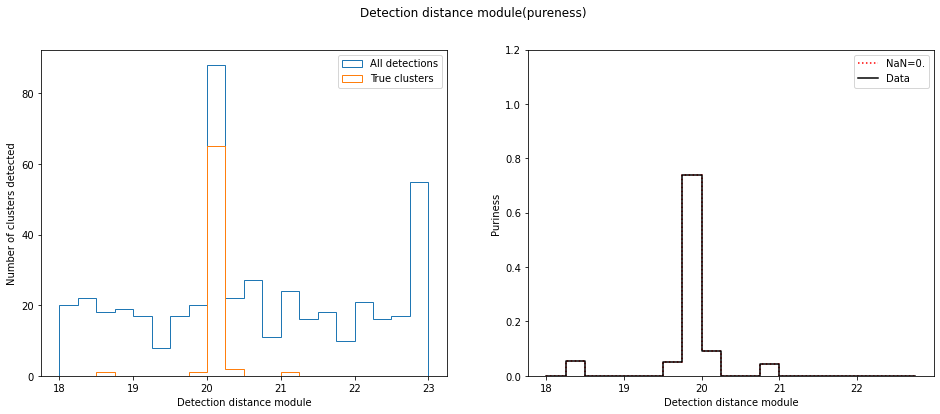

In [20]:
plot_pure(m_M_det, m_M_det_conf , 'Detection distance module', 'Detection distance module(pureness)')

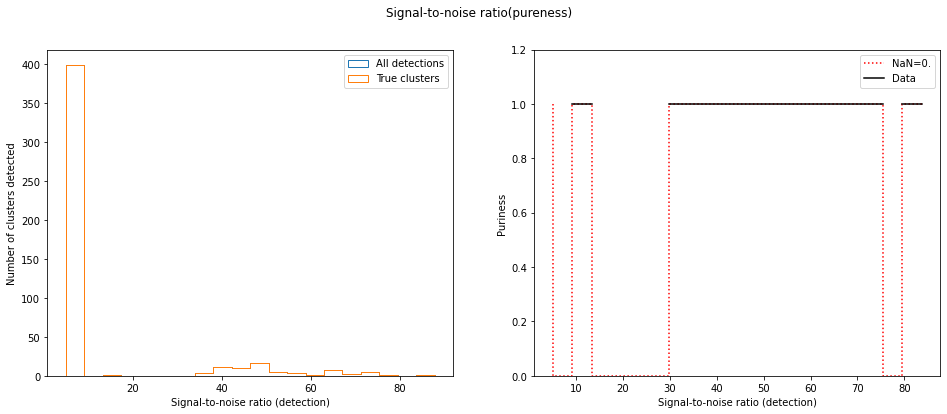

In [21]:
plot_pure(SNR, SNR_conf, 'Signal-to-noise ratio (detection)', 'Signal-to-noise ratio(pureness)')

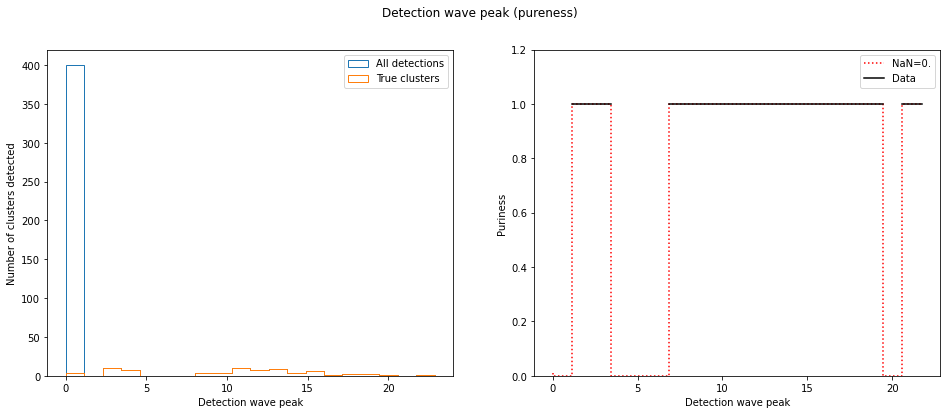

In [22]:
plot_pure(wave_peak, wave_peak_conf , 'Detection wave peak', 'Detection wave peak (pureness)')

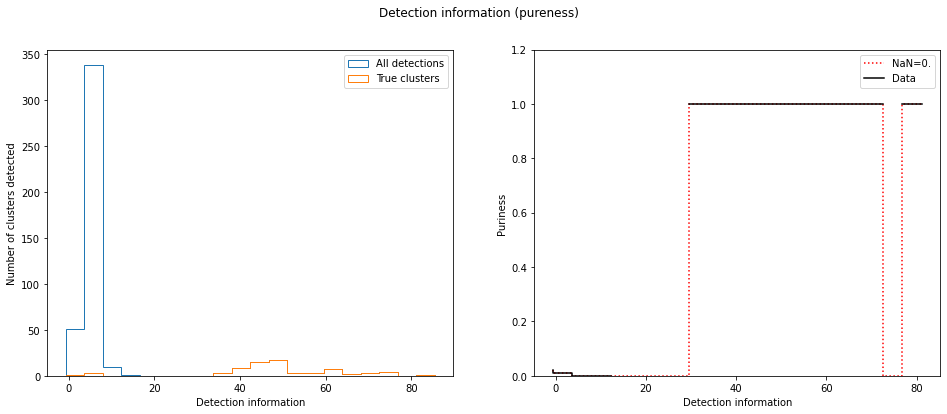

In [23]:
plot_pure(SNR_rank, SNR_rank_conf , 'Detection information', 'Detection information (pureness)')

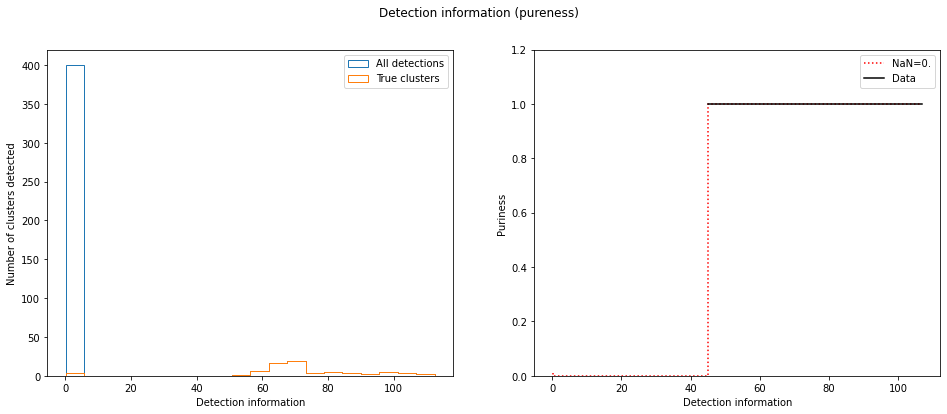

In [24]:
plot_pure(Wave_r3, Wave_r3_conf , 'Detection information', 'Detection information (pureness)')

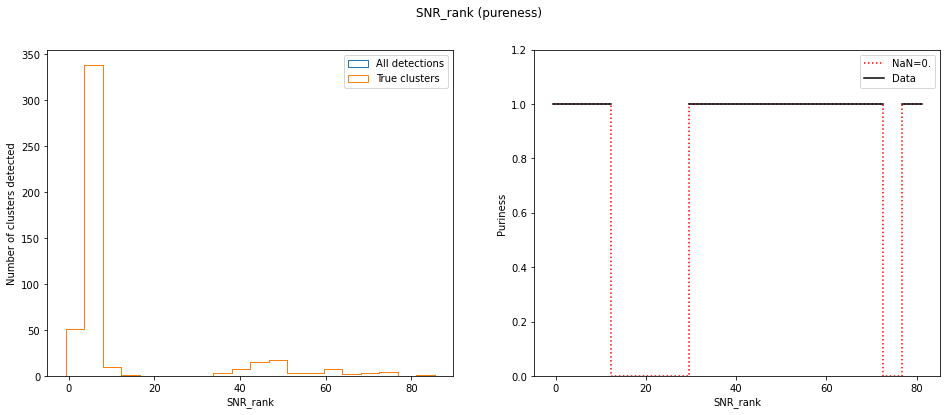

In [27]:
plot_pure(SNR_rank, SNR_rank , 'SNR_rank', 'SNR_rank (pureness)')

In [32]:
!jupyter nbconvert --to html pureness1.ipynb --output output.html

[NbConvertApp] Converting notebook pureness1.ipynb to html
[NbConvertApp] Writing 891125 bytes to output.html


In [31]:
$jupyter nbconvert pureness1.ipynb --to html --output output.html

SyntaxError: invalid syntax (2033075816.py, line 1)